In [85]:
#!pip install tensorflow
import pandas as pd
import os
import seaborn as sns
from tqdm import tqdm 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [86]:
#Il dataset con tutte le immagini si trova nella stessa cartella di questo file eseguibile.
#Nella lista all_original_images ci saranno tutte le immagini del dataset e ogni elemento sarà del tipo:
#'Nome_Classe-numero.png'
all_original_images = []
for dirname,  _, filenames in os.walk("."):
    for filename in filenames:
        if (filename[-3:] == 'png'):
            all_original_images.append(os.path.join(filename))

In [87]:
#Verifichiamo di aver caricato tutte le immagini cioè che la lunghezza sia 21165
len(all_original_images)

21165

In [88]:
#La lista labels tiene traccia dell'etichetta associata ad ogni immagine quindi ogni elemento sarà del tipo:
#'Nome_Classe'
labels = []
for image in all_original_images:
    labels.append(image.split("-")[0])

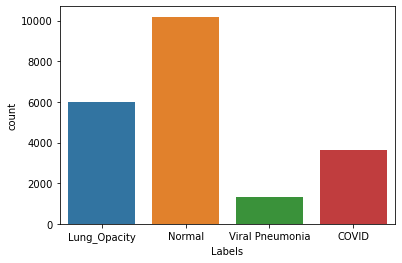

Normal: 10192
Lung Opacity: 6012
Viral Pneumonia: 1345
Covid: 3616


In [89]:
df = pd.DataFrame(labels, columns=['Labels'])
sns.countplot(df['Labels'])
plt.show()

print('Normal:', labels.count('Normal'))
print('Lung Opacity:', labels.count('Lung_Opacity'))
print('Viral Pneumonia:', labels.count('Viral Pneumonia'))
print('Covid:', labels.count('COVID'))

Il dataset è sbilanciato, proseguiamo dunque con la data augmentation SOLO PER LA CARTELLA TRAIN (ottenuta eseguendo uno split del dataset 80% train e 20% test) solo per la classe COVID, Viral Pneumonia e Lung Opacity. Le operazioni di trasformazione scelte sono: rotazione, traslazione.

In [ ]:
all_train_images = []
for dirname,  _, filenames in os.walk('train'):
    for filename in filenames:
        if (filename[-3:] == 'png'):
            all_train_images.append(os.path.join(filename))

In [90]:
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator

for k in all_train_images:
    image_class = k.split("-")[0]
    if (image_class == 'Normal'):
        continue
    img = load_img('train'+image_class+'/'+k)  
    data = img_to_array(img)
    sample = expand_dims(data, 0)
    datagen = ImageDataGenerator(rotation_range=180, width_shift_range=100, height_shift_range=100) 
    i = 0
    for batch in datagen.flow(sample, batch_size = 1, save_to_dir ='train'+image_class, save_prefix =image_class+'-aug-', save_format ='png'):
        i += 1
        if (((image_class == 'Lung_Opacity') and (i > 1))
            or ((image_class == 'COVID') and (i > 2)) 
            or ((image_class == 'Viral Pneumonia') and (i > 8))): 
            break
    